In [3]:
from os import listdir, path, mkdir
from datetime import datetime
import requests
import shutil
import matplotlib.pyplot as plt # Import the Matplotlib package
from osgeo import gdal # Import the GDAL library

In [4]:
# Load the data from NOAA website, if needed
if not path.exists("gfs_data/") or len([f for f in listdir("gfs_data/") if not f.startswith('.')]) == 0:
    files_to_download = []
    today = datetime.today()

    # Download the GFS data from the past 1 month (there's roughly 1 year of data online, each month is ~1GB)
    month_str = "0" + str(today.month - 1) if len(str(today.month - 1)) == 1 else str(today.month - 1)
    month_string = str(today.year) + month_str

    for day in range(1,29):
        for suffix in [".grb2", ".inv"]:
            day_str = "0" + str(day) if len(str(day)) == 1 else str(day)
            date_string = month_string + day_str
            data_file_name = "gfs_3_" + month_string + day_str + "_0000_000" + suffix
            files_to_download.append((date_string, data_file_name))
            r = requests.get("https://nomads.ncdc.noaa.gov/data/gfs-avn-hi/"+ month_string + "/" + date_string
                         + "/" + data_file_name, stream=True)
            if not path.exists("gfs_data/"):
                mkdir("gfs_data/")
            with open("gfs_data/" + data_file_name, 'wb') as fin:
                shutil.copyfileobj(r.raw, fin)
                fin.close()    
    
    print("success")

In [8]:
# The data is in GRIB (GRIdded Binary or General Regularly-distributed Information in Binary form)
# Fun fact: NAM uses GRIB second edition (which is distinct from GRIB first edition sub-version 2)
# The .INV files have an "inventory" of the data.
# See https://www.nco.ncep.noaa.gov/pmb/products/gfs/gfs.t00z.pgrb2.0p25.f003.shtml for English explanations of params
file = 'rap_130_20131206_0500_001.grb2' #example filename

grib = gdal.Open('gfs_data/gfs_3_20190701_0000_000.grb2')
print(grib)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x1118fb6c0> >


In [11]:
band = grib.GetRasterBand(142)
data = band.ReadAsArray()
print(data)

[[26.20000076 26.20000076 26.20000076 ... 26.20000076 26.20000076
  26.20000076]
 [47.29999924 47.10000229 46.79999924 ... 47.90000153 47.70000076
  47.5       ]
 [50.10000229 49.29999924 48.5        ... 51.79999924 51.29999924
  50.70000076]
 ...
 [75.90000153 78.30000305 80.80000305 ... 67.70000458 70.59999847
  73.40000153]
 [47.20000076 47.40000153 48.10000229 ... 46.5        46.79999924
  47.        ]
 [53.70000076 53.70000076 53.70000076 ... 53.70000076 53.70000076
  53.70000076]]


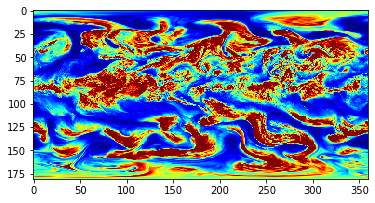

In [12]:
plt.imshow(data, cmap='jet')